Summary: Occurences of differences were observed for different ranges of feature LSTAT, which is mainly responsible for the differences.
- For values up to 6.3, A may predict 1 while B predicts 2,
- for values up to 9.5, A may predict 2 while B predicts 1,
- for values from 9.5 upwards, A may predict 0 while B predicts 1.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from baseline import print_rules
from tasks.boston_housing import make_task3 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


# General Explanations

In [3]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)
class_names = comparer.class_names
classes = comparer.classes
classes_present = np.unique(mclass_diff)
diff_classes_present = classes_present[np.in1d(classes_present, comparer.difference_classes)]

In [4]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, mclass_diff)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_title('Relative feature importance')
    ax.scatter(np.flip(feature_importances[feature_order]),
               np.flip(comparer.feature_names[feature_order]))
    ax.set_xlim((-0.05, ax.get_xlim()[1]))
    plt.show()
    
    if tree.get_depth() <= 3:
        fig, ax = plt.subplots(figsize=(14, 14))
        plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
        plt.show()
    
    for focus_class in class_names[diff_classes_present]:
        print(focus_class)
        print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=mclass_diff, precision=2, feature_order=feature_order)

    print('\ndata evaluation:')
    print(classification_report(mclass_diff, tree.predict(X), labels=classes_present, target_names=class_names[classes_present]))

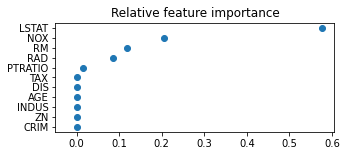

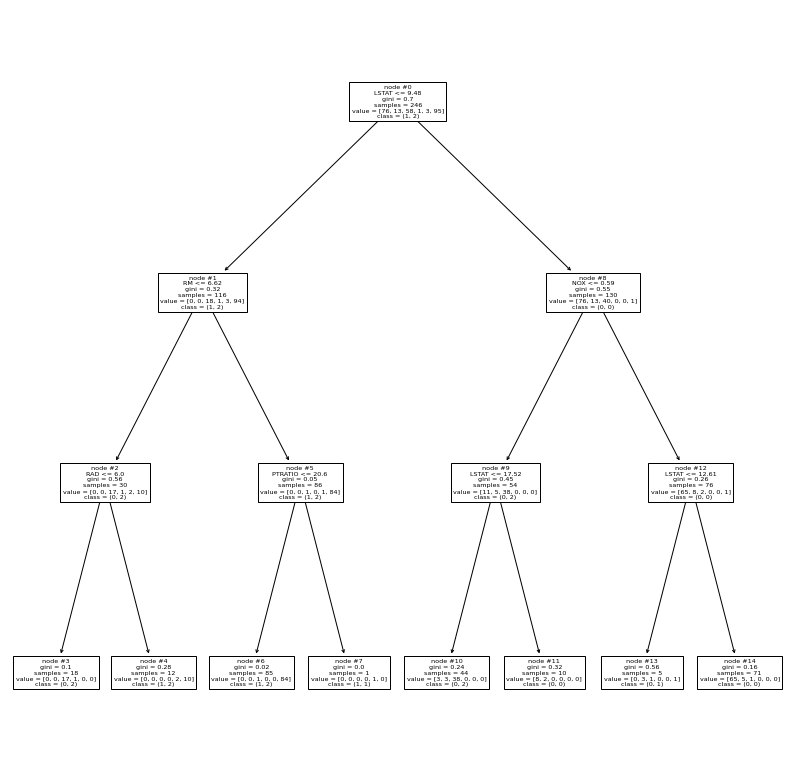

(0, 1)
node #13: if (LSTAT > 9.48) and (LSTAT <= 12.61) and (NOX > 0.59) then class (0, 1) (covers 0.6 of 5 instances)
(1, 2)
(2, 1)
node #7: if (LSTAT <= 9.48) and (RM > 6.62) and (PTRATIO > 20.6) then class (2, 1) (covers 1.0 of 1 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.90      0.96      0.93        76
      (0, 1)       0.60      0.23      0.33        13
      (1, 1)       0.89      0.95      0.92        58
      (1, 2)       0.00      0.00      0.00         1
      (2, 1)       1.00      0.33      0.50         3
      (2, 2)       0.97      0.99      0.98        95

    accuracy                           0.92       246
   macro avg       0.73      0.58      0.61       246
weighted avg       0.91      0.92      0.91       246



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [5]:
explain(max_depth=3)

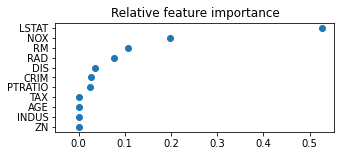

(0, 1)
node #24: if (LSTAT > 9.48) and (LSTAT <= 12.61) and (NOX > 0.59) and (NOX <= 0.62) then class (0, 1) (covers 1.0 of 3 instances)
node #21: if (LSTAT > 17.52) and (NOX <= 0.59) and (PTRATIO > 20.6) then class (0, 1) (covers 0.667 of 3 instances)
(1, 2)
(2, 1)
node #8: if (LSTAT <= 9.48) and (RM <= 6.62) and (RAD > 6.0) and (DIS > 1.48) then class (2, 1) (covers 0.667 of 3 instances)
node #13: if (LSTAT <= 9.48) and (RM > 6.62) and (PTRATIO > 20.6) then class (2, 1) (covers 1.0 of 1 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.93      0.97      0.95        76
      (0, 1)       0.83      0.38      0.53        13
      (1, 1)       0.90      0.98      0.94        58
      (1, 2)       0.00      0.00      0.00         1
      (2, 1)       0.75      1.00      0.86         3
      (2, 2)       1.00      0.98      0.99        95

    accuracy                           0.94       246
   macro avg       0.74      0.72      0.71

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [6]:
explain(max_depth=4)

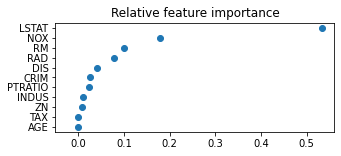

(0, 1)
node #38: if (LSTAT > 12.61) and (LSTAT <= 17.72) and (NOX > 0.59) and (CRIM <= 0.98) then class (0, 1) (covers 0.8 of 5 instances)
node #24: if (LSTAT > 16.72) and (LSTAT <= 17.52) and (NOX <= 0.59) and (DIS > 2.27) then class (0, 1) (covers 0.667 of 3 instances)
node #35: if (LSTAT > 9.48) and (LSTAT <= 12.61) and (NOX > 0.59) and (INDUS > 18.84) then class (0, 1) (covers 1.0 of 3 instances)
node #29: if (LSTAT > 17.52) and (NOX <= 0.59) and (DIS > 3.79) and (PTRATIO > 20.6) then class (0, 1) (covers 1.0 of 2 instances)
(1, 2)
node #5: if (LSTAT <= 6.26) and (RM <= 6.62) and (RAD <= 6.0) and (ZN <= 20.0) then class (1, 2) (covers 1.0 of 1 instances)
(2, 1)
node #11: if (LSTAT <= 9.48) and (NOX <= 0.74) and (RM <= 6.62) and (RAD > 6.0) and (DIS > 1.48) then class (2, 1) (covers 1.0 of 2 instances)
node #17: if (LSTAT <= 9.48) and (RM > 6.62) and (CRIM > 0.01) and (PTRATIO > 20.6) then class (2, 1) (covers 1.0 of 1 instances)

data evaluation:
              precision    recall  

In [7]:
explain(max_depth=5)

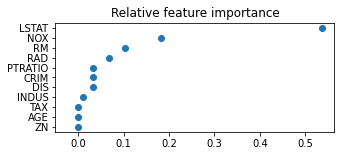

(0, 1)
node #44: if (LSTAT > 16.29) and (LSTAT <= 17.72) and (NOX > 0.59) and (CRIM <= 0.98) then class (0, 1) (covers 1.0 of 4 instances)
node #39: if (LSTAT > 9.48) and (LSTAT <= 12.61) and (NOX > 0.59) and (INDUS > 18.84) then class (0, 1) (covers 1.0 of 3 instances)
node #32: if (LSTAT > 17.52) and (NOX <= 0.59) and (PTRATIO > 20.6) and (CRIM <= 1.42) then class (0, 1) (covers 1.0 of 2 instances)
node #27: if (LSTAT > 16.72) and (LSTAT <= 17.08) and (NOX <= 0.59) and (DIS > 2.27) then class (0, 1) (covers 1.0 of 2 instances)
node #49: if (LSTAT > 12.61) and (LSTAT <= 14.31) and (NOX > 0.59) and (RM > 5.95) and (CRIM > 0.98) then class (0, 1) (covers 1.0 of 1 instances)
(1, 2)
node #6: if (LSTAT <= 6.26) and (NOX > 0.46) and (RM <= 6.62) and (RAD <= 6.0) then class (1, 2) (covers 1.0 of 1 instances)
(2, 1)
node #11: if (LSTAT <= 9.48) and (NOX <= 0.74) and (RM <= 6.62) and (RAD > 6.0) and (DIS > 1.48) then class (2, 1) (covers 1.0 of 2 instances)
node #17: if (LSTAT <= 9.48) and (RM

In [8]:
explain(max_depth=6)

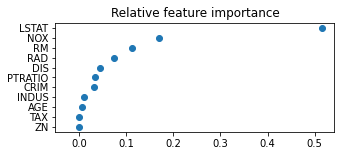

(0, 1)
node #47: if (LSTAT > 12.61) and (LSTAT <= 17.72) and (NOX > 0.59) and (RM <= 6.09) and (CRIM <= 0.98) then class (0, 1) (covers 1.0 of 4 instances)
node #43: if (LSTAT > 9.48) and (LSTAT <= 12.61) and (NOX > 0.59) and (INDUS > 18.84) then class (0, 1) (covers 1.0 of 3 instances)
node #36: if (LSTAT > 17.52) and (LSTAT <= 19.53) and (NOX <= 0.59) and (PTRATIO > 20.6) then class (0, 1) (covers 1.0 of 2 instances)
node #31: if (LSTAT > 16.72) and (LSTAT <= 17.52) and (NOX <= 0.59) and (DIS > 2.27) and (DIS <= 5.52) then class (0, 1) (covers 1.0 of 2 instances)
node #25: if (LSTAT > 9.48) and (LSTAT <= 16.72) and (NOX <= 0.59) and (DIS > 2.27) and (DIS <= 4.31) and (PTRATIO <= 16.5) then class (0, 1) (covers 1.0 of 1 instances)
node #53: if (LSTAT > 12.61) and (LSTAT <= 14.31) and (NOX > 0.59) and (RM > 5.95) and (CRIM > 0.98) then class (0, 1) (covers 1.0 of 1 instances)
(1, 2)
node #6: if (LSTAT <= 6.26) and (RM <= 6.62) and (RAD <= 6.0) and (CRIM > 0.21) then class (1, 2) (cover

In [9]:
explain()